## Case study : PARKINSONS PREDICTION  


## by -Geeth, Saikrishna, Shrusthi, Jui & Ved 

In [1]:
## Importing the necessary libraries and packages
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler    
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Importing data and performing exploratory data analysis

In [2]:
file = r'parkinsons.data' 

In [3]:
p_data = pd.read_csv(file)

In [4]:
p_data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
p_data.shape

(195, 24)

In [6]:
p_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
p_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [9]:
p_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
p_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<AxesSubplot:ylabel='Frequency'>

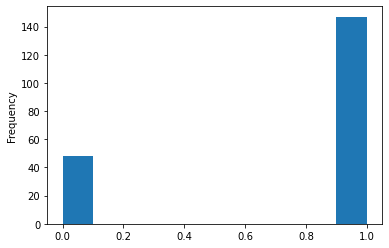

In [11]:
p_data['status'].astype(int).plot.hist()

## Checking if there are any missing or null values in the dataset

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [13]:
missing_data(p_data)

,Total,Percent
name,0,0.0
MDVP:Fo(Hz),0,0.0
D2,0,0.0
spread2,0,0.0
spread1,0,0.0
DFA,0,0.0
RPDE,0,0.0
status,0,0.0
HNR,0,0.0
NHR,0,0.0


In [14]:
p_data.columns.values

array(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype=object)

## Plotting a heatmap to check the correlation among the columns

In [15]:
corr = p_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Dropping the columns which have correlation greater than 0.35

In [16]:
x=p_data.drop(columns=['name','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5', 'MDVP:APQ','spread1','spread2','PPE','MDVP:Fo(Hz)','MDVP:Flo(Hz)','HNR'],axis=1)
y=p_data['status']

In [17]:
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,Shimmer:APQ3,Shimmer:DDA,NHR,status,RPDE,DFA,D2
MDVP:Fhi(Hz),1.000000,0.102086,-0.029198,0.097177,0.091126,0.097150,-0.003743,-0.003733,0.163766,-0.166136,-0.112404,-0.343097,0.176323
MDVP:Jitter(%),0.102086,1.000000,0.935714,0.990276,0.974256,0.990276,0.746625,0.746635,0.906959,0.278220,0.360673,0.098572,0.433434
MDVP:Jitter(Abs),-0.029198,0.935714,1.000000,0.922911,0.897778,0.922913,0.697153,0.697170,0.834972,0.338653,0.441839,0.175036,0.310694
MDVP:RAP,0.097177,0.990276,0.922911,1.000000,0.957317,1.000000,0.744912,0.744919,0.919521,0.266668,0.342140,0.064083,0.426605
MDVP:PPQ,0.091126,0.974256,0.897778,0.957317,1.000000,0.957319,0.763580,0.763592,0.844604,0.288698,0.333274,0.196301,0.412524
Jitter:DDP,0.097150,0.990276,0.922913,1.000000,0.957319,1.000000,0.744894,0.744901,0.919548,0.266646,0.342079,0.064026,0.426556
Shimmer:APQ3,-0.003743,0.746625,0.697153,0.744912,0.763580,0.744894,1.000000,1.000000,0.716207,0.347617,0.435242,0.151124,0.467265
Shimmer:DDA,-0.003733,0.746635,0.697170,0.744919,0.763592,0.744901,1.000000,1.000000,0.716215,0.347608,0.435237,0.151132,0.467261
NHR,0.163766,0.906959,0.834972,0.919521,0.844604,0.919548,0.716207,0.716215,1.000000,0.189429,0.370890,-0.131882,0.470949
status,-0.166136,0.278220,0.338653,0.266668,0.288698,0.266646,0.347617,0.347608,0.189429,1.000000,0.308567,0.231739,0.340232


In [18]:
x=p_data.drop(columns=['name','status'],axis=1)
y=p_data['status']

## Model Fitting

In [19]:
def getModelResults(x,y,model,ts):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts,random_state=2)
    model.fit(x_train, y_train)
    st_x= StandardScaler()    
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test)       
    y_predicted = model.predict(x_test)
    
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)

In [20]:
model = RandomForestClassifier()

getModelResults(x,y,model,0.25)

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.77      0.75      0.76        40

    accuracy                           0.61        49
   macro avg       0.38      0.38      0.38        49
weighted avg       0.63      0.61      0.62        49

Confusion matrix:
 [[ 0  9]
 [10 30]]


In [21]:
model = LogisticRegression()

getModelResults(x,y,model,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.95      0.61      0.75        31

    accuracy                           0.67        39
   macro avg       0.66      0.74      0.63        39
weighted avg       0.83      0.67      0.70        39

Confusion matrix:
 [[ 7  1]
 [12 19]]


In [22]:
model = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='gini',

max_depth=10,

min_samples_leaf=10, 

n_estimators=20,
n_jobs=-1,
random_state=5)


getModelResults(x,y,model,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      1.00      0.89        31

    accuracy                           0.79        39
   macro avg       0.40      0.50      0.44        39
weighted avg       0.63      0.79      0.70        39

Confusion matrix:
 [[ 0  8]
 [ 0 31]]


In [23]:
model = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='entropy',

max_depth=10,

min_samples_leaf=10, 

n_estimators=20,
n_jobs=-1,
random_state=5)


getModelResults(x,y,model,0.2)

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      1.00      0.89        31

    accuracy                           0.79        39
   macro avg       0.40      0.50      0.44        39
weighted avg       0.63      0.79      0.70        39

Confusion matrix:
 [[ 0  8]
 [ 0 31]]


In [24]:
model = DecisionTreeClassifier()

getModelResults(x,y,model,0.25)

Classification report:
               precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.82      0.93      0.87        40

    accuracy                           0.78        49
   macro avg       0.54      0.52      0.51        49
weighted avg       0.72      0.78      0.74        49

Confusion matrix:
 [[ 1  8]
 [ 3 37]]


In [25]:
input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)

In [26]:
input_data_as_numpy_array=np.asarray(input_data)

In [27]:
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

In [28]:
prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("person is healthy")
else:
    print("person is unhealthy")

[0]
person is healthy
